# Import Libraries and read the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.drop(['id'], axis = 1, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
import os
import random
state = 7
os.environ['PYTHONHASHSEED'] = str(state)
random.seed(state)
np.random.seed(state)

In [4]:
#Shuffle the dataset
from sklearn.utils import shuffle
df = shuffle(df, random_state = state)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull().sum() * 100/len(df)
# About 3.93% of bmi values are missing

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
df['stroke'].value_counts()
#It is an imbalanced dataset

0    4861
1     249
Name: stroke, dtype: int64

## Categorical features 

In [9]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 14})

In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [11]:
cat = [x for x in df.columns if df[x].dtype == 'O']

In [12]:
for f in cat:
    print(f)
    print(df[f].value_counts())
    print('=============================================')

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [13]:
# Since there is only one data point with gender = 'Other' lets remove that 
df = df.loc[df['gender'] != 'Other']

### Barplot 

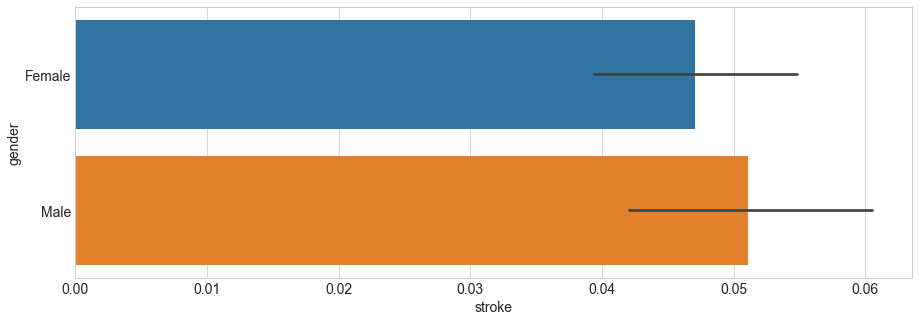

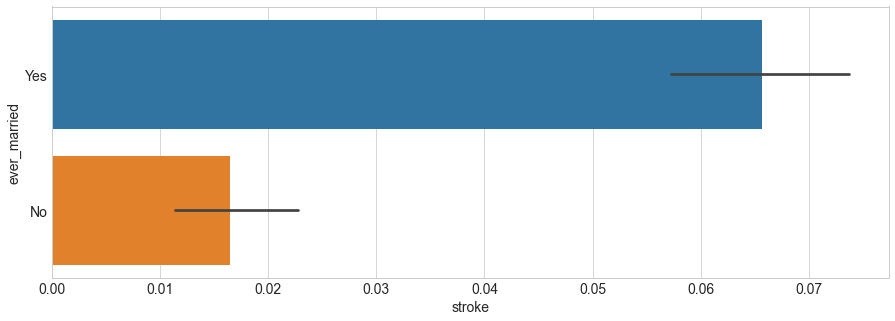

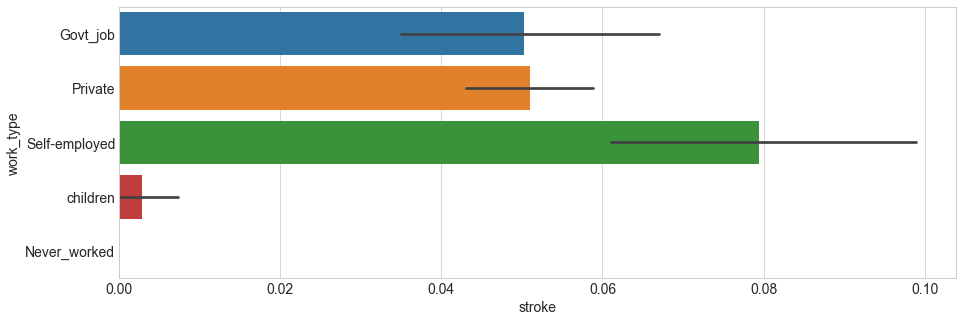

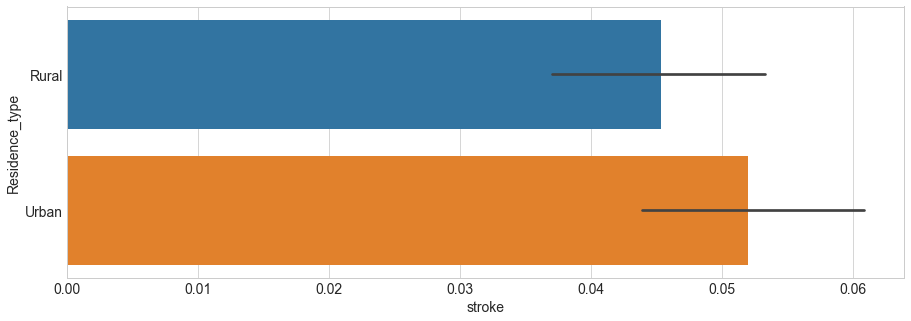

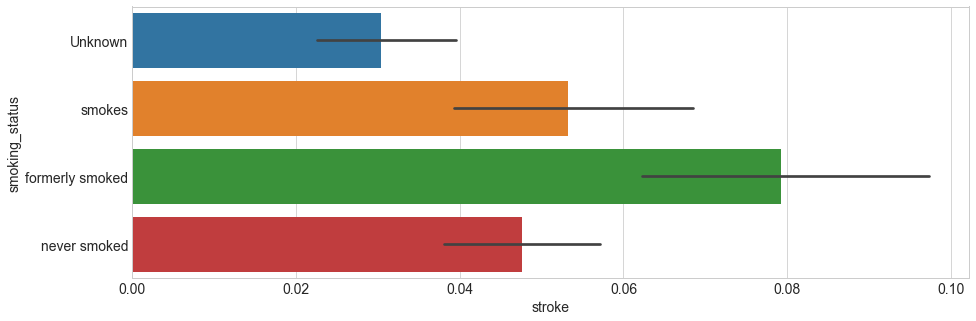

In [14]:
for f in cat:
    plt.figure(figsize = (15, 5))
    sns.barplot(x = df['stroke'], y = df[f])

### Inference:
1. Males have a slightly higher cahnce of getting stroke.
2. Being married has a very high chance of getting stroke when compared to being single.
3. Self employed persons are highly vulnerable to stroke than other work types.
4. There doesn't seem to have significant diffrence on getting stroke between Rural and Urban residence type.
5. 'Formerly smoked', followed by 'smokes' have the highest risk of getting stroke.

### Countplot 

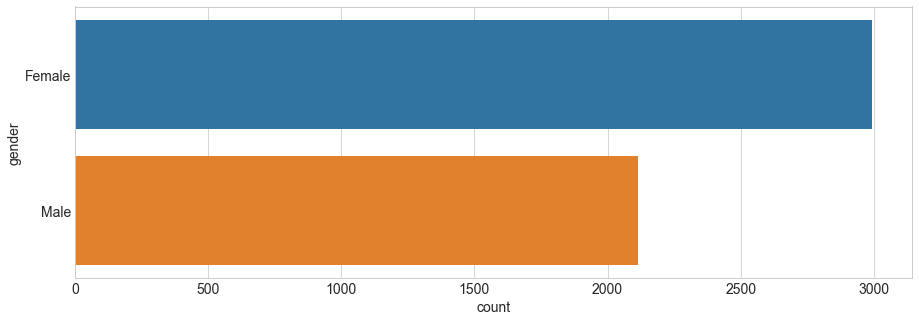

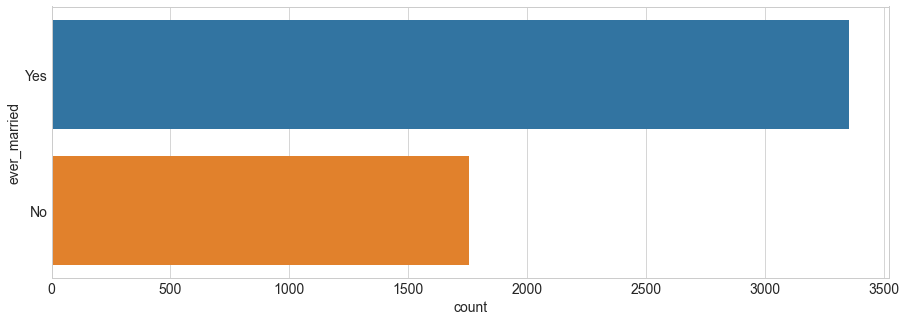

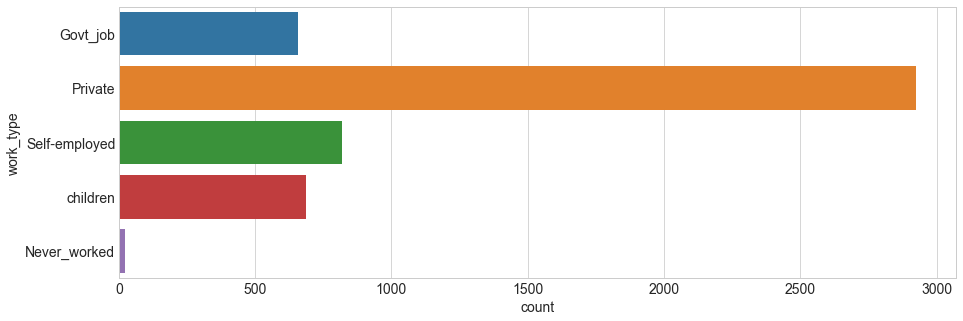

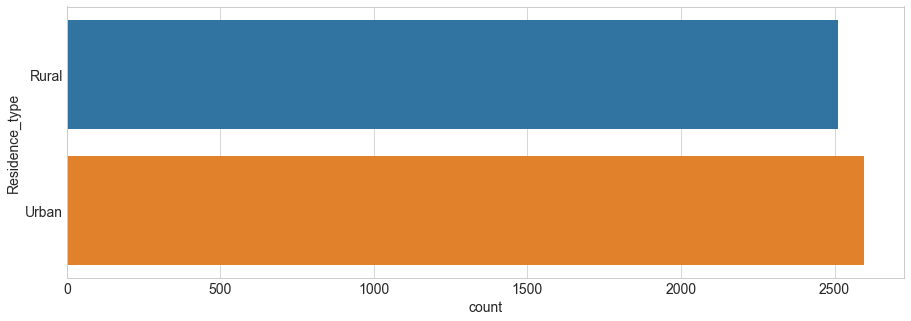

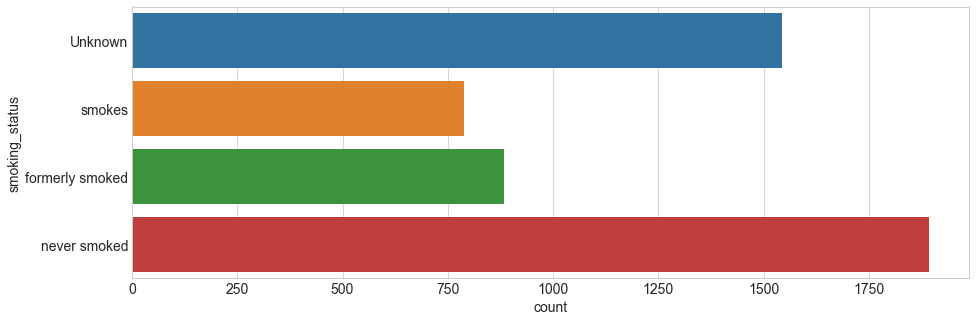

In [15]:
for f in cat:
    plt.figure(figsize = (15, 5))
    sns.countplot(y = df[f])

## Numerical features 

In [16]:
num = [x for x in df.columns if df[x].dtype != 'O' and x != 'stroke']

In [17]:
for f in num:
    print(f)
    print(df[f].nunique())
    print('=========================')

age
104
hypertension
2
heart_disease
2
avg_glucose_level
3978
bmi
418


### Discrete Features 

In [18]:
disc = ['hypertension', 'heart_disease']

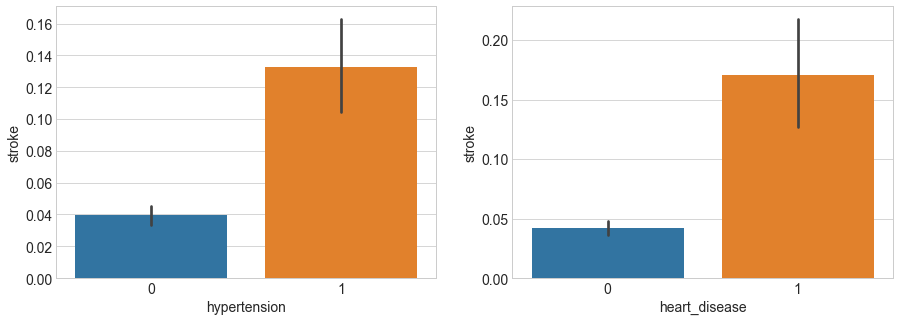

In [19]:
plt.figure(figsize = (15,5))
n = 0
for f in disc:
    n += 1
    plt.subplot(1, 2, n)
    sns.barplot(y = df['stroke'], x = df[f])

### Inference:
1. People having hypertension and heart disease have very high risk of getting stroke.

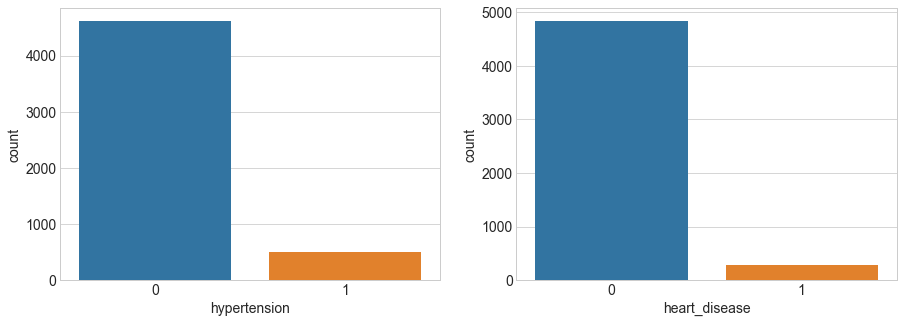

In [20]:
plt.figure(figsize = (15,5))
n = 0
for f in disc:
    n += 1
    plt.subplot(1, 2, n)
    sns.countplot(x = df[f])

### Continuous Features

In [21]:
cont = [x for x in num if x not in disc]

#### Regplot 

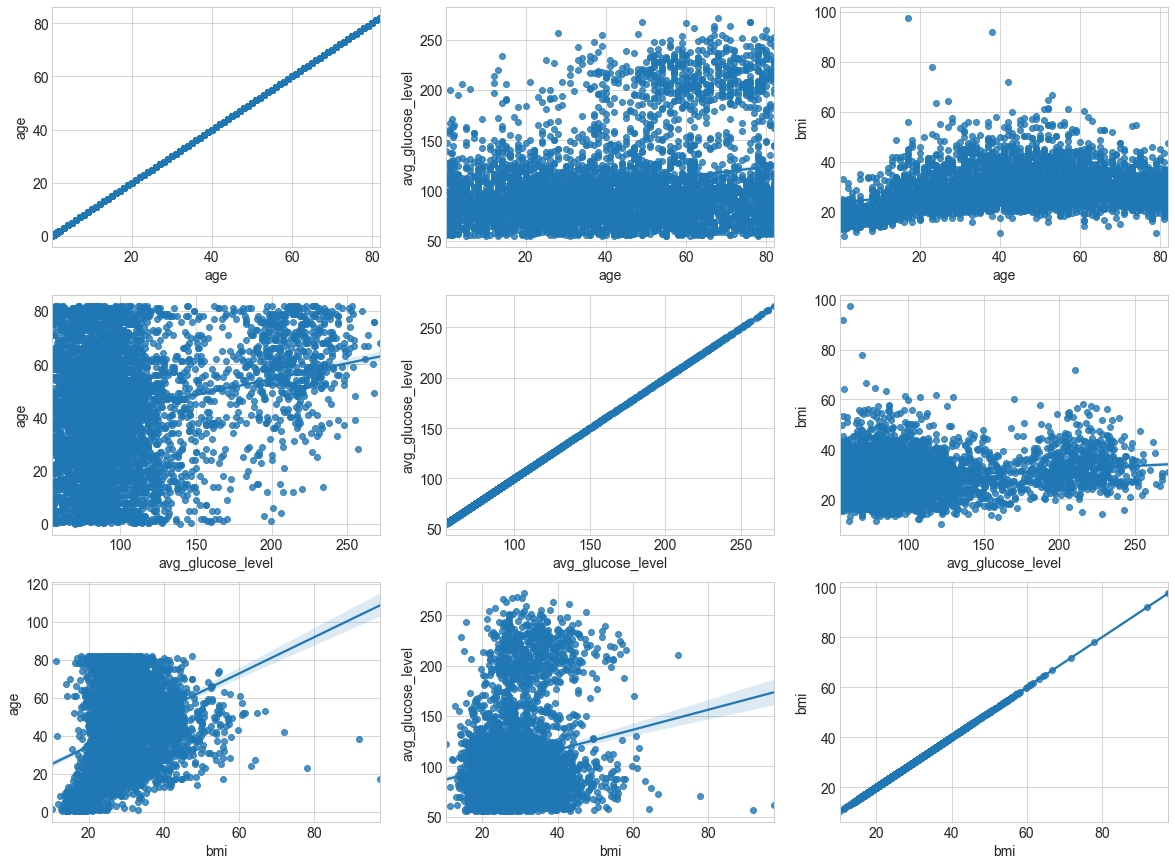

In [22]:
plt.figure(figsize = (20, 15))
n = 0
for x in cont:
    for y in cont: 
        n += 1
        plt.subplot(3, 3, n)
        sns.regplot(x = df[x], y = df[y])

### Inference:
1. Average glucose level seems to increase as age increase.

#### Scatterplot  

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

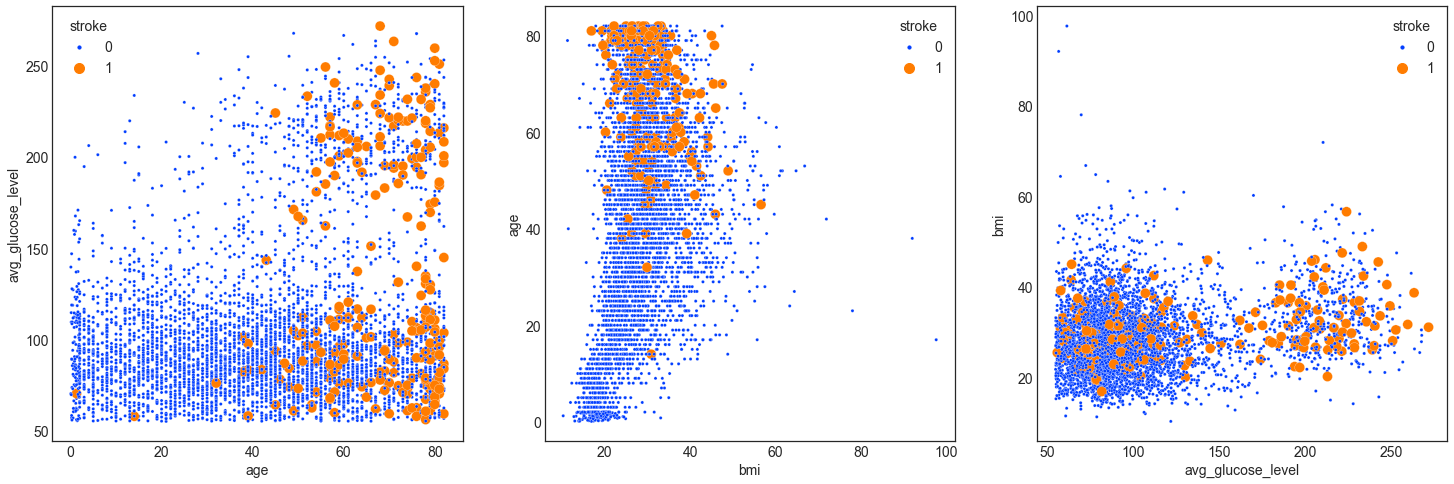

In [23]:
plt.style.use('seaborn-white')
plt.figure(figsize = (25, 8))
plt.subplot(1, 3, 1)
sns.scatterplot(x = df['age'], y = df['avg_glucose_level'], hue = df['stroke'], size = df['stroke'],
                sizes = (10, 100), size_order = [1, 0], palette = 'bright')
plt.subplot(1, 3, 2)
sns.scatterplot(x = df['bmi'], y = df['age'], hue = df['stroke'], size = df['stroke'], 
                sizes = (10, 100), size_order = [1, 0], palette = 'bright')
plt.subplot(1, 3, 3)
sns.scatterplot(x = df['avg_glucose_level'], y = df['bmi'], hue = df['stroke'], 
                sizes = (10, 100), size = df['stroke'], size_order = [1, 0], palette = 'bright')

### Inference:
1. People with higher age are more prone to stroke.

### Distplot, Boxplot and Probplot 

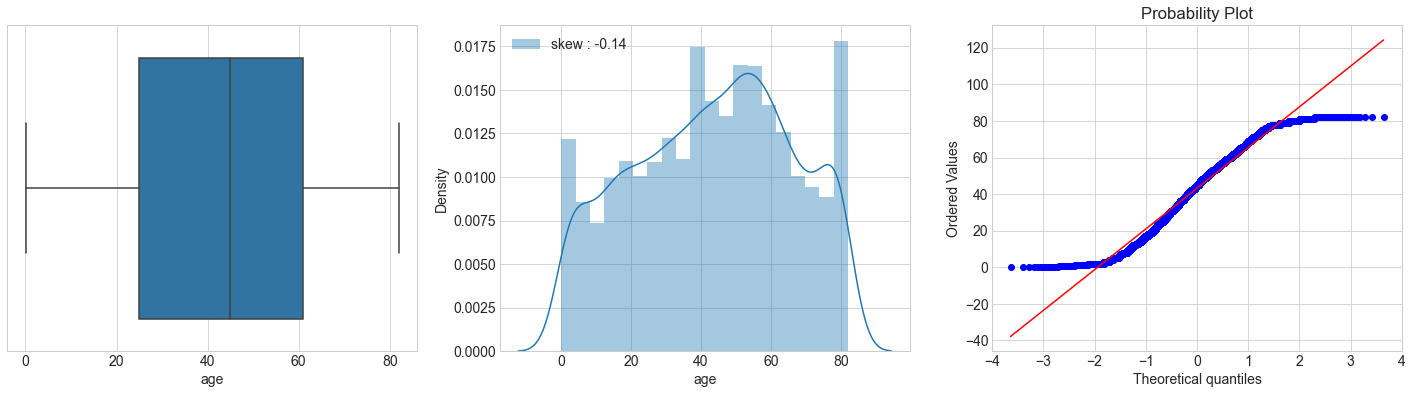

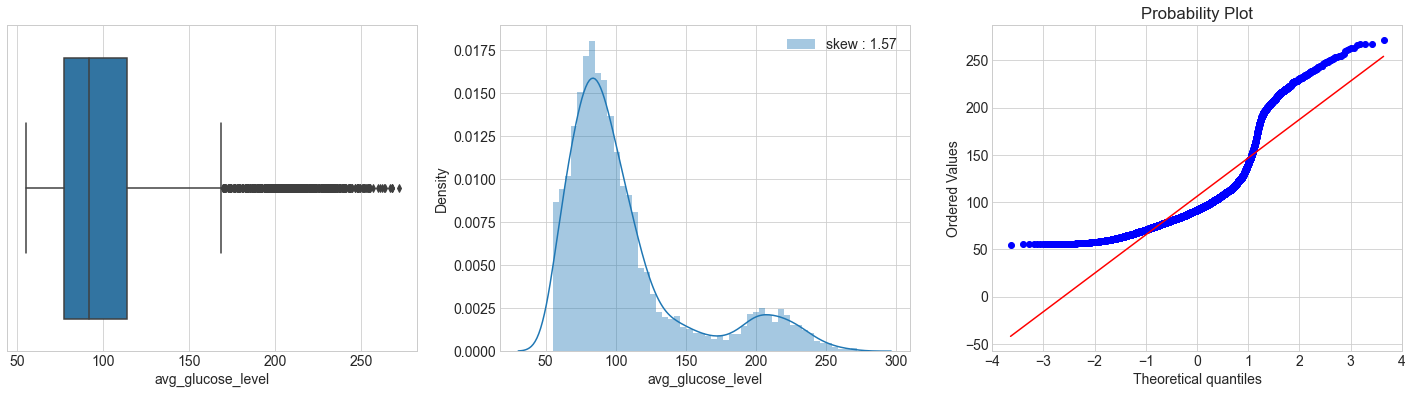

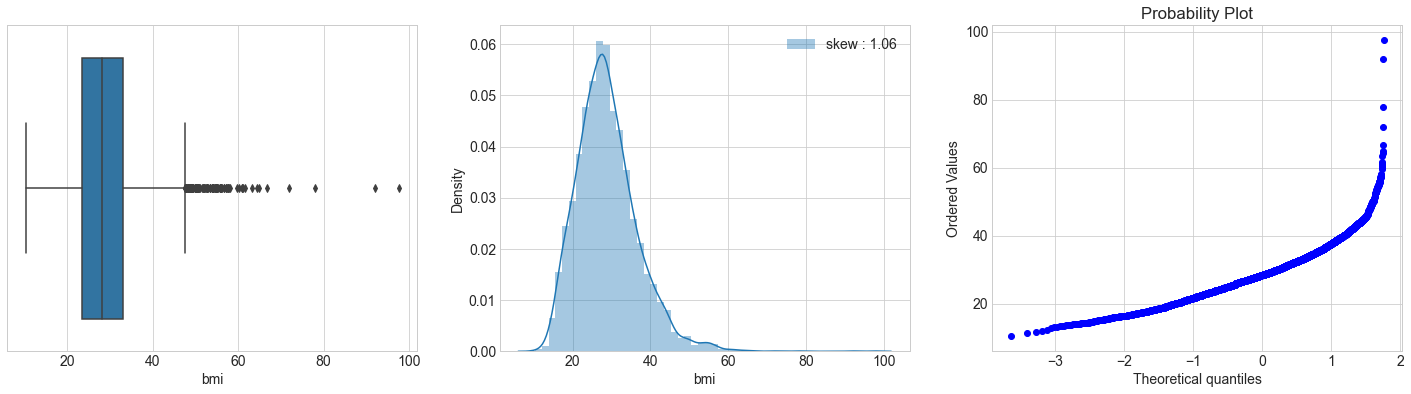

In [24]:
plt.style.use('seaborn-whitegrid')
for f in cont:
    plt.figure(figsize = (25,6))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(x = df[f])
    
    plt.subplot(1, 3, 2)
    sns.distplot(x = df[f], label = 'skew : '+ str(round(df[f].skew(), 2)))
    plt.xlabel(f)
    plt.legend()
    
    plt.subplot(1, 3, 3)
    probplot(x = df[f], plot = plt)
    
    plt.show()

### Gaussian Transformation 

## Outliers 

## Feature Importance 

Text(0, 0.5, 'Features')

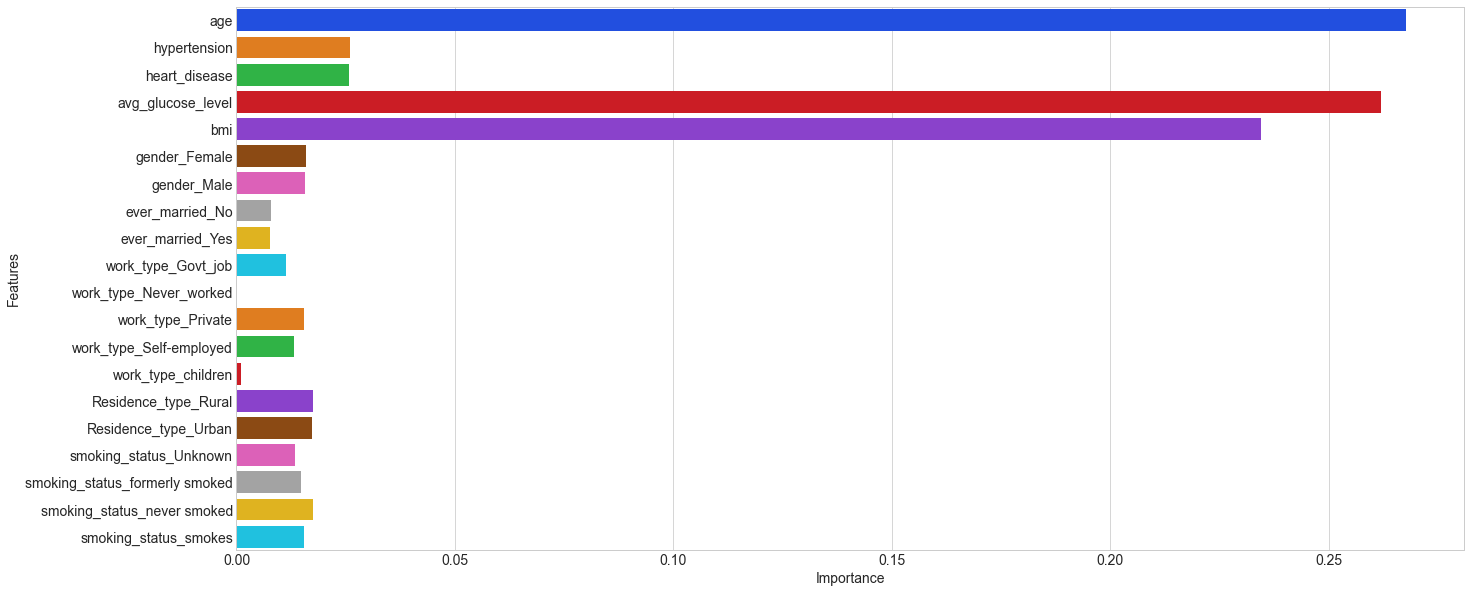

In [25]:
#ExtraTreesClassifier

from sklearn.impute import KNNImputer
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

dummy = df.copy()
imputer = KNNImputer(n_neighbors = 7)
dummy[num] = imputer.fit_transform(dummy[num])

dummy_x = dummy.drop(['stroke'], axis = 1)
dummy_y = dummy['stroke']
dummy_x = pd.get_dummies(dummy_x)
etc.fit(dummy_x, dummy_y)

plt.figure(figsize = (22, 10))
sns.barplot(x = etc.feature_importances_, y = dummy_x.columns, palette = 'bright')
plt.xlabel('Importance')
plt.ylabel('Features')

<AxesSubplot:>

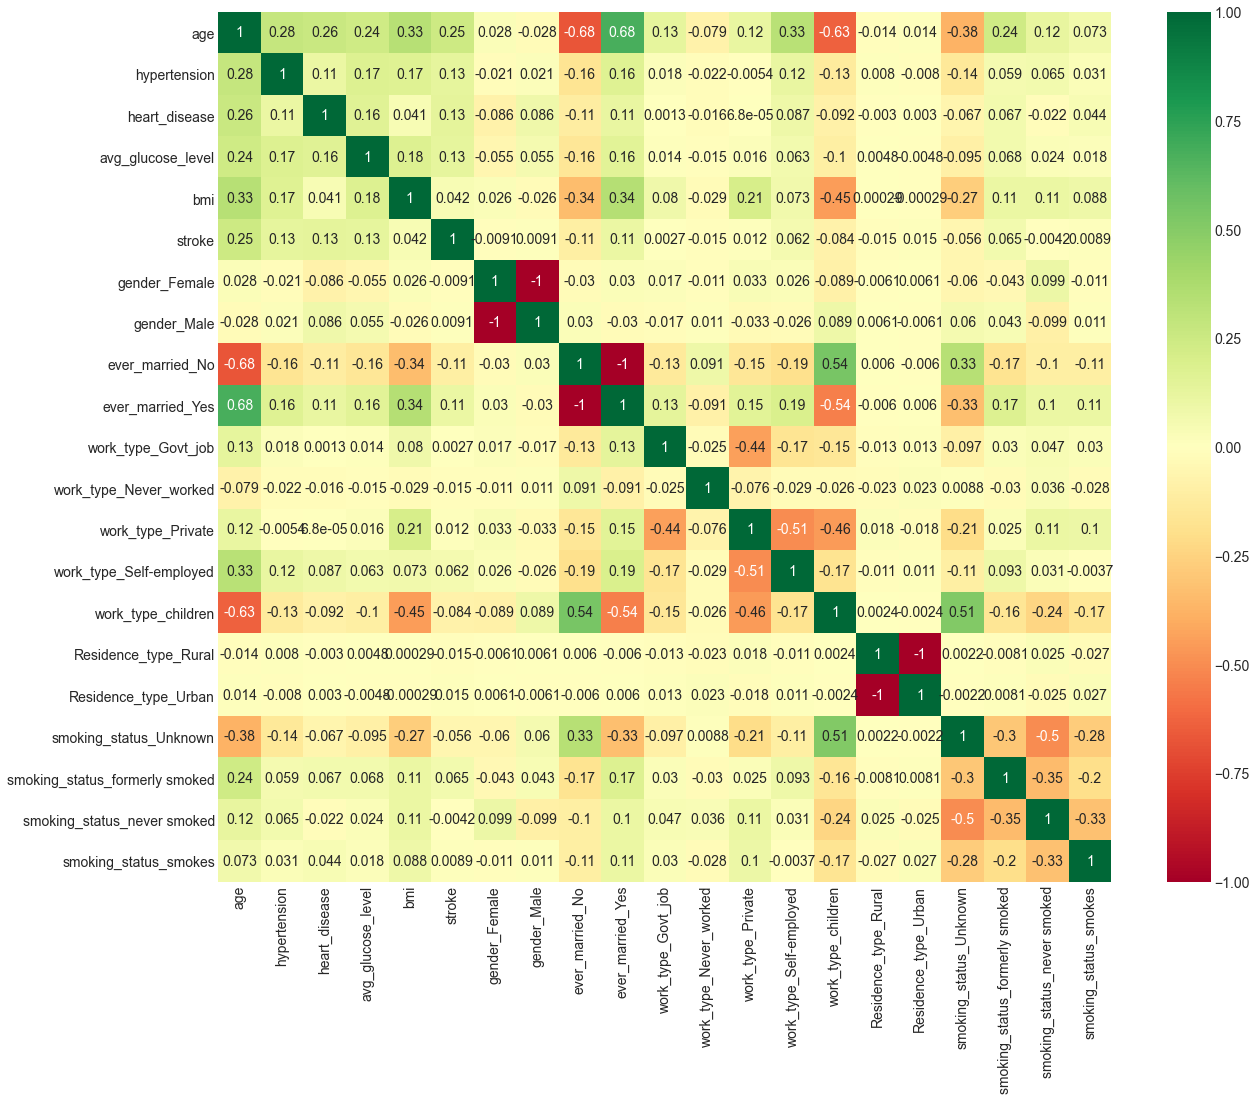

In [26]:
#Correlation Matrix

plt.figure(figsize = (20,16))
sns.heatmap(pd.get_dummies(df).corr(), annot = True, cmap = 'RdYlGn')

## Train Test split 

In [27]:
X = df.drop(['stroke'], axis = 1)
y = df['stroke']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = state)

In [29]:
pd.DataFrame(X_train).head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2477,Male,21.0,0,0,No,Private,Urban,120.94,29.7,formerly smoked
1349,Female,51.0,0,0,Yes,Private,Urban,102.11,23.1,never smoked
4946,Female,15.0,0,0,No,children,Urban,121.39,27.0,Unknown
2174,Female,36.0,0,0,Yes,Private,Urban,99.72,22.3,smokes
2609,Male,41.0,0,0,Yes,Private,Urban,111.71,38.9,formerly smoked
1178,Female,42.0,1,0,Yes,Private,Rural,89.96,35.6,never smoked
4996,Female,52.0,1,0,Yes,Private,Rural,213.54,32.0,never smoked
4686,Male,5.0,0,0,No,children,Urban,84.50,15.8,Unknown
1626,Female,7.0,0,0,No,children,Rural,72.35,17.0,Unknown
2854,Female,68.0,1,0,Yes,Private,Urban,150.74,40.3,Unknown


## Preprocessing

In [30]:
# Lets build the preprocessing pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [31]:
ct1 = ColumnTransformer([
    ('imputer', KNNImputer(n_neighbors = 7), num),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'), cat)
], remainder = 'drop')

In [32]:
pipe_preprocess = Pipeline([
    ('ColumnTransformer1', ct1),
    ('Scaler', RobustScaler()),
])

In [33]:
X_train = pipe_preprocess.fit_transform(X_train)
X_test = pipe_preprocess.transform(X_test)

## SMOTE Oversampling

In [34]:
#SMOTE is a oversampling technique to handle imbalanced dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = state)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [35]:
pd.DataFrame(y_train)['stroke'].value_counts()

1    3644
0    3644
Name: stroke, dtype: int64

## Building Model 

In [36]:
# Lazypredict lets us compare all models with few lines of code
from lazypredict.Supervised import LazyClassifier
lazy = LazyClassifier(random_state = state)
models, predictions = lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:19<00:00,  1.52it/s]


In [37]:
models.drop(['Balanced Accuracy'], axis = 1)

,Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,
LinearSVC,0.75,0.80,0.82,0.66
LinearDiscriminantAnalysis,0.75,0.80,0.82,0.05
RidgeClassifierCV,0.75,0.80,0.82,0.04
RidgeClassifier,0.75,0.80,0.82,0.02
LogisticRegression,0.76,0.80,0.83,0.05
CalibratedClassifierCV,0.76,0.79,0.83,2.45
BernoulliNB,0.71,0.77,0.79,0.03
NearestCentroid,0.63,0.75,0.74,0.02
SGDClassifier,0.77,0.73,0.83,0.06


## Logistic Regression and tuning its hyperparameters

In [38]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_confusion_matrix

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [40]:
from sklearn.model_selection import GridSearchCV
params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': np.logspace(-4, 4, 10),
    'random_state': [state],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [41]:
grid = GridSearchCV(lr, params, scoring = 'roc_auc', cv = 10, n_jobs = -1, verbose = 1)
grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1947 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   22.8s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': [7],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc', verbose=1)

In [42]:
grid.best_params_

{'C': 1291.5496650148827,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'newton-cg'}

In [43]:
best = grid.best_estimator_
round(grid.best_score_ * 100, 2)

84.6

In [44]:
y_pred = best.predict(X_test)
print(classification_report(y_test, y_pred))
print('ROC AUC Score : ',round(roc_auc_score(y_test, y_pred) * 100, 2))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86      1216
           1       0.15      0.84      0.25        62

    accuracy                           0.76      1278
   macro avg       0.57      0.80      0.55      1278
weighted avg       0.95      0.76      0.83      1278

ROC AUC Score :  79.6


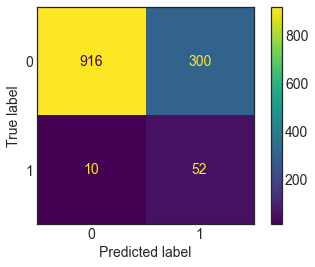

In [45]:
plt.style.use('seaborn-white')
plot_confusion_matrix(best, X_test, y_test)

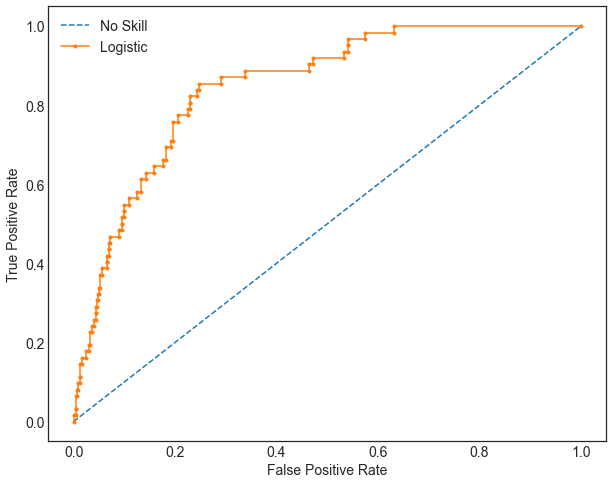

Optimal Threshold value is: 0.49852849137328414


In [61]:
# Optimum threshold and ROC curve
y_hat = best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize = (10, 8))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("Optimal Threshold value is:", optimal_threshold)

In [62]:
final_pipe = Pipeline([
    ('prepocess', pipe_preprocess),
    ('model', best)
])

In [63]:
# Save the model
import joblib
joblib.dump(final_pipe, 'model')

['model']

## Predict Stroke 

In [64]:
# Load the model
import joblib
model = joblib.load('model')

In [65]:
new = pd.DataFrame([['Female', 55, 1, 0, 'Yes', 'Private', 'Urban', 120, 40, 'smokes']], columns = df.columns[:-1])
new

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,55,1,0,Yes,Private,Urban,120,40,smokes


In [66]:
model.predict(new)[0]

1